In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import plotly.graph_objs as go
import plotly.express as px

In [3]:
df = pd.read_csv("final_data_w_garch.csv")
df

date    open    high     low   close  adjClose  changePercent  \
0     2018-08-21   62.13   63.38   61.92   63.33     62.74       1.939641   
1     2018-08-22   63.00   65.75   62.97   65.71     65.09       4.293654   
2     2018-08-23   65.32   67.37   65.18   66.71     66.09       2.135799   
3     2018-08-24   66.79   68.20   66.75   68.06     67.42       1.886372   
4     2018-08-27   68.36   69.72   68.04   68.97     68.33       0.907022   
...          ...     ...     ...     ...     ...       ...            ...   
1425  2024-04-22  781.04  800.73  764.00  795.18    795.18       1.810000   
1426  2024-04-23  807.69  827.69  802.64  824.23    824.23       2.050000   
1427  2024-04-24  839.50  840.82  791.83  796.77    796.77      -5.090000   
1428  2024-04-25  788.68  833.23  782.23  826.32    826.32       4.770000   
1429  2024-04-26  838.18  883.31  833.87  877.35    877.35       4.670000   

        volume      vwap    return  ...  realized_vol  implied_vol  \
0     67398800   62.8800  0.022111  ...      0.027280     0.009564   
1     74985600   64.8100  0.037581  ...      0.033284     0.015390   
2     72068400   66.4200  0.015218  ...      0.033114     0.009865   
3     53151200   67.6700  0.020237  ...      0.009817     0.011328   
4     50577600   68.9100  0.013371  ...      0.009564     0.009385   
...        ...       ...       ...  ...           ...          ...   
1425  59634051  785.2375  0.043543  ...      0.056381     0.036365   
1426  43855937  815.5625  0.036533  ...      0.059730          NaN   
1427  51220753  817.2300 -0.033316  ...      0.059138          NaN   
1428  42464073  807.6150  0.037087  ...      0.062596          NaN   
1429  54570914  858.1775  0.061756  ...      0.036365          NaN   

      news_sentiment  press_sentiment  weighted_average_sentiment       h.1  \
0             0.3818              NaN                     0.38180  0.025186   
1                NaN              NaN                     0.00000  0.027202   
2            -0.1027              NaN                    -0.10270  0.026704   
3                NaN              NaN                     0.00000  0.026606   
4                NaN              NaN                     0.00000  0.026087   
...              ...              ...                         ...       ...   
1425          0.0772              NaN                     0.07720  0.041677   
1426          0.5017              0.0                     0.30102  0.040891   
1427          0.4767              NaN                     0.47670  0.039932   
1428          0.3612              NaN                     0.36120  0.039431   
1429          0.4111              NaN                     0.41110  0.041978   

           h.2       h.3       h.4       h.5  
0     0.025748  0.026272  0.026760  0.027217  
1     0.027630  0.028032  0.028408  0.028762  
2     0.027165  0.027595  0.027999  0.028377  
3     0.027072  0.027509  0.027918  0.028301  
4     0.026588  0.027056  0.027493  0.027903  
...        ...       ...       ...       ...  
1425  0.041375  0.041086  0.040810  0.040545  
1426  0.040623  0.040366  0.040120  0.039884  
1427  0.039705  0.039487  0.039279  0.039080  
1428  0.039225  0.039028  0.038840  0.038661  
1429  0.041664  0.041363  0.041075  0.040798  

[1430 rows x 21 columns]

In [110]:
select_col = df[['open', 'high', 'low', 'close', 'volume', 'vwap']]
select_col.describe()

open         high          low        close        volume  \
count  1430.000000  1430.000000  1430.000000  1430.000000  1.430000e+03   
mean    202.334741   206.107776   198.410713   202.441664  4.733390e+07   
std     184.880683   188.210733   181.129213   184.785906  2.068161e+07   
min      31.620000    32.490000    31.120000    31.770000  9.788400e+06   
25%      64.570000    66.810000    63.272500    65.740000  3.394005e+07   
50%     144.685000   146.875000   141.865000   144.790000  4.406720e+07   
75%     249.200000   255.092500   241.432500   247.565000  5.737835e+07   
max     958.510000   974.000000   935.100000   950.020000  2.511528e+08   

              vwap  
count  1430.000000  
mean    202.334561  
std     184.739182  
min      31.800000  
25%      65.535000  
50%     144.390000  
75%     247.557500  
max     948.047500

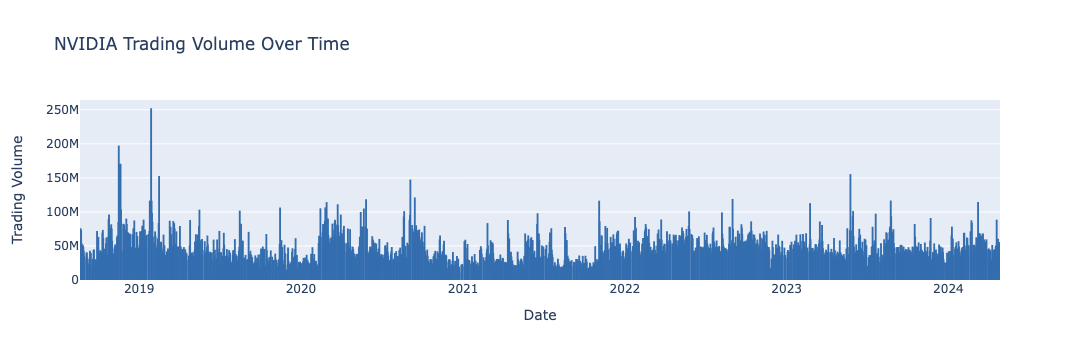

In [111]:
fig = px.bar(df, x='date', y='volume', title='NVIDIA Trading Volume Over Time')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Trading Volume',
    bargap=0.2,  # Control the space between bars
)
fig.update_traces(marker_line_color='#346EAF',
                  marker_line_width=1.5, opacity=1.0)

fig.show()

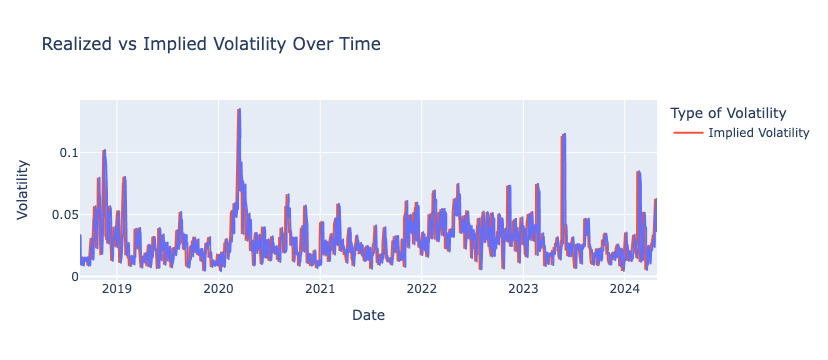

In [112]:
#A line plot showing realized and implied volatility over time to compare market expectations with actual price fluctuations.

fig = px.line(df, x='date', y='realized_vol', title='Realized vs Implied Volatility Over Time')
fig.add_scatter(x=df['date'], y=df['implied_vol'], mode='lines', name='Implied Volatility')

# Update layout for better visibility
fig.update_layout(
    yaxis_title='Volatility',
    xaxis_title='Date',
    legend_title='Type of Volatility'
)

# Show the plot
fig.show()



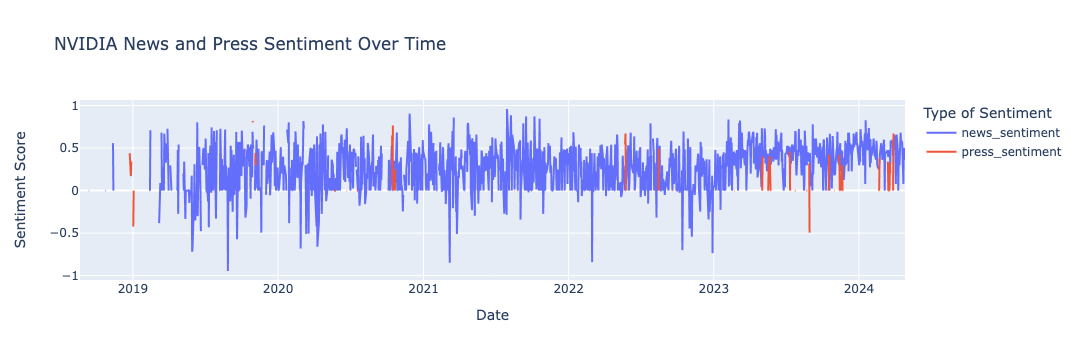

In [113]:

fig = px.line(df, x='date', y=['news_sentiment', 'press_sentiment'],
              labels={'value': 'Sentiment Score', 'date': 'Date'},
              title='NVIDIA News and Press Sentiment Over Time')

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sentiment Score',
    legend_title='Type of Sentiment'
)

fig.show()

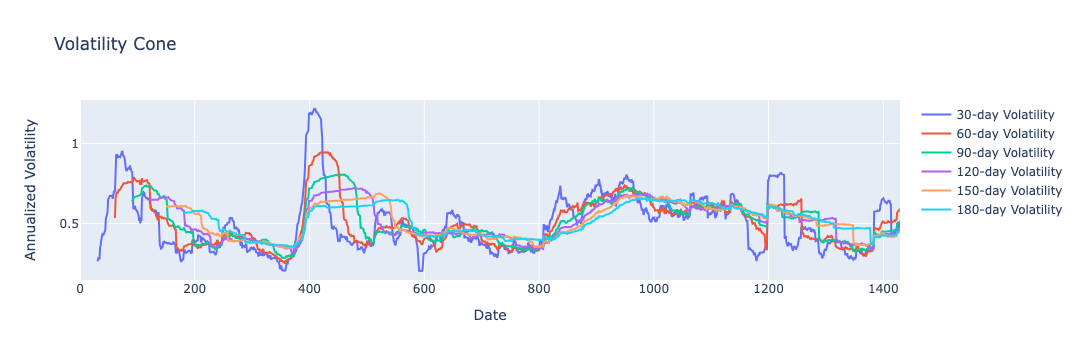

In [11]:
window_sizes = [30, 60, 90, 120, 150, 180]  # Different rolling windows
volatility_data = pd.DataFrame(index=df.index)

for window in window_sizes:
    rolling_vol = df['close'].pct_change().rolling(window).std() * (252 ** 0.5)  # Annualize the volatility
    volatility_data[f'{window}_day_vol'] = rolling_vol

# Plot the historical volatility for each window size
fig = go.Figure()
for window in window_sizes:
    fig.add_trace(go.Scatter(x=volatility_data.index, y=volatility_data[f'{window}_day_vol'], mode='lines', name=f'{window}-day Volatility'))

fig.update_layout(title='Volatility Cone', xaxis_title='Date', yaxis_title='Annualized Volatility')
fig.show()

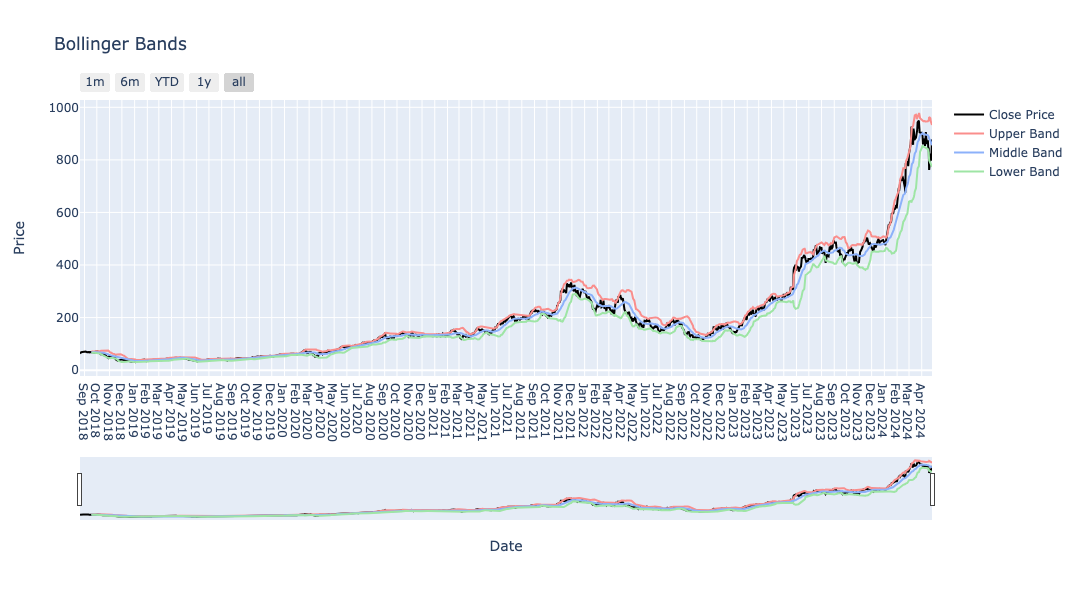

In [7]:
# Calculate 20-day SMA and Bollinger Bands
df['date'] = pd.to_datetime(df['date'])


df['20_day_SMA'] = df['close'].rolling(window=20).mean()
df['Upper_Band'] = df['20_day_SMA'] + (df['close'].rolling(window=20).std() * 2)
df['Lower_Band'] = df['20_day_SMA'] - (df['close'].rolling(window=20).std() * 2)

# Plot the Bollinger Bands
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['close'], name='Close Price', line=dict(color='black')))
fig.add_trace(go.Scatter(x=df['date'], y=df['Upper_Band'], name='Upper Band', line=dict(color='#FA8E8C')))
fig.add_trace(go.Scatter(x=df['date'], y=df['20_day_SMA'], name='Middle Band', line=dict(color='#8CB1FA')))
fig.add_trace(go.Scatter(x=df['date'], y=df['Lower_Band'], name='Lower Band', line=dict(color='#9EE5A5')))
fig.update_layout(
    title='Bollinger Bands', 
    xaxis_title='Date', 
    yaxis_title='Price',
    xaxis=dict(
        tickformat='%Y-%m-%d',
        type='date'
    ),
    height=600
)
fig.update_xaxes(
    dtick="M1",
    tickformat="%b %Y"
)
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)


fig.show()
